In [ ]:
%matplotlib inline
import pandas as pd
import csv as csv
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
#from sklearn import datasets, linear_model
import matplotlib
import matplotlib.pylab as pl
#from matplotlib import rcParams
#from mpl_toolkits.basemap import Basemap
#import sqlite3

In [2]:
mn = pd.read_csv('../data/MN.csv', header=0,
                 dtype={'ZoneDist4':str, 'SPDist1':str, 'SPDist2':str, 'EDesigNum':str,'LtdHeight':str}
                )

In [3]:
#st = 'Borough,Block,Lot,CD,CT2010,CB2010,SchoolDist,Council,ZipCode,FireComp,PolicePrct,HealthArea,SanitBoro,SanitDistrict,SanitSub,Address,ZoneDist1,ZoneDist2,ZoneDist3,ZoneDist4,Overlay1,Overlay2,SPDist1,SPDist2,LtdHeight,AllZoning1,AllZoning2,SplitZone,BldgClass,LandUse,Easements,OwnerType,OwnerName,LotArea,BldgArea,ComArea,ResArea,OfficeArea,RetailArea,GarageArea,StrgeArea,FactryArea,OtherArea,AreaSource,NumBldgs,NumFloors,UnitsRes,UnitsTotal,LotFront,LotDepth,BldgFront,BldgDepth,Ext,ProxCode,IrrLotCode,LotType,BsmtCode,AssessLand,AssessTot,ExemptLand,ExemptTot,YearBuilt,BuiltCode,YearAlter1,YearAlter2,HistDist,Landmark,BuiltFAR,ResidFAR,CommFAR,FacilFAR,BoroCode,BBL,CondoNo,Tract2010,XCoord,YCoord,ZoneMap,ZMCode,Sanborn,TaxMap,EDesigNum,APPBBL,APPDate,PLUTOMapID,Version'

In [4]:
#li = st.split(',')

In [5]:
#li[81]

In [3]:
mn.head()

,Borough,Block,Lot,CD,CT2010,CB2010,SchoolDist,Council,ZipCode,FireComp,...,YCoord,ZoneMap,ZMCode,Sanborn,TaxMap,EDesigNum,APPBBL,APPDate,PLUTOMapID,Version
0,MN,1,10,101,5.0,1018.0,2.0,1.0,10004.0,E007,...,190225.0,16a,Y,199 999,10101.0,NaN,0.0,NaN,1,16v1
1,MN,1,101,101,1.0,1001.0,2.0,1.0,10004.0,E007,...,190636.0,16a,Y,199 999,10101.0,NaN,0.0,NaN,1,16v1
2,MN,1,201,101,1.0,1000.0,2.0,1.0,10004.0,E007,...,193648.0,12b,NaN,199 999,10101.0,NaN,0.0,NaN,1,16v1
3,MN,1,301,101,NaN,NaN,2.0,1.0,10004.0,E007,...,NaN,12b,NaN,199 999,10101.0,NaN,0.0,NaN,4,16v1
4,MN,1,401,101,NaN,NaN,2.0,1.0,10004.0,E007,...,NaN,12b,NaN,1 99 999,10101.0,NaN,0.0,NaN,4,16v1


In [4]:
mn.columns

Index(['Borough', 'Block', 'Lot', 'CD', 'CT2010', 'CB2010', 'SchoolDist',
       'Council', 'ZipCode', 'FireComp', 'PolicePrct', 'HealthArea',
       'SanitBoro', 'SanitDistrict', 'SanitSub', 'Address', 'ZoneDist1',
       'ZoneDist2', 'ZoneDist3', 'ZoneDist4', 'Overlay1', 'Overlay2',
       'SPDist1', 'SPDist2', 'LtdHeight', 'AllZoning1', 'AllZoning2',
       'SplitZone', 'BldgClass', 'LandUse', 'Easements', 'OwnerType',
       'OwnerName', 'LotArea', 'BldgArea', 'ComArea', 'ResArea', 'OfficeArea',
       'RetailArea', 'GarageArea', 'StrgeArea', 'FactryArea', 'OtherArea',
       'AreaSource', 'NumBldgs', 'NumFloors', 'UnitsRes', 'UnitsTotal',
       'LotFront', 'LotDepth', 'BldgFront', 'BldgDepth', 'Ext', 'ProxCode',
       'IrrLotCode', 'LotType', 'BsmtCode', 'AssessLand', 'AssessTot',
       'ExemptLand', 'ExemptTot', 'YearBuilt', 'BuiltCode', 'YearAlter1',
       'YearAlter2', 'HistDist', 'Landmark', 'BuiltFAR', 'ResidFAR', 'CommFAR',
       'FacilFAR', 'BoroCode', 'BBL', 'CondoNo'

In [5]:
mn.OwnerName.nunique()

33422

In [6]:
len(mn)

43158

In [7]:
mn.loc[mn.NumFloors == mn.NumFloors.max(),'LandUse']

295    5.0
Name: LandUse, dtype: float64

In [8]:
mn.AssessTot.nunique()

24114

In [9]:
len(mn[mn.AssessTot==0])

528

In [11]:
mn[mn.AssessTot!=0].sort_values(by ='AssessTot', ascending=False)[['ZipCode','AssessTot']][:10]

,ZipCode,AssessTot
18223,10065.0,3302640000
295,10007.0,1299184650
17285,10019.0,906933152
16388,10036.0,771809400
22301,10022.0,766783350
21862,10020.0,648205652
16347,10009.0,612072900
10619,10001.0,608369850
22101,10017.0,578211300
21864,10020.0,515041650


In [12]:
len(mn[mn.AssessTot<100000])

5781

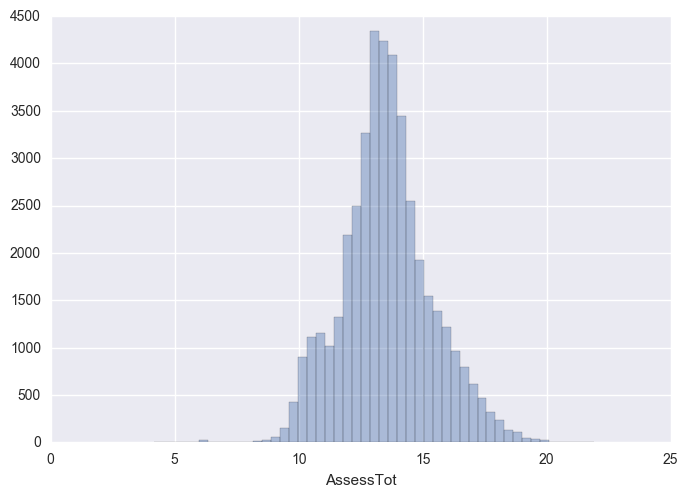

In [13]:
sns.distplot(np.log(mn.loc[(mn.AssessTot>10)&(mn.AssessTot>0),'AssessTot']),kde=False)

In [14]:
mn.AssessTot.max()

3302640000

In [69]:
mn[(mn.AssessTot!=0) & 
    (mn.OwnerType!='C') &
    (mn.OwnerType!='X') &
    (mn.OwnerType!='O') &
    (mn.OwnerType!='M')].sort_values(by ='AssessTot', ascending=False)[['Address',
                                                                        'AssessTot',
                                                                        'AssessLand',
                                                                        'Landmark',
                                                                        'UnitsRes',
                                                                        'UnitsTotal',
                                                                        #'OwnerName',
                                                                        #'NumBldgs',
                                                                        'BldgArea',
                                                                        'ResArea',
                                                                        'ComArea',
                                                                        'OfficeArea',
                                                                        'AreaSource']][:10]

,Address,AssessTot,AssessLand,Landmark,UnitsRes,UnitsTotal,BldgArea,ResArea,ComArea,OfficeArea,AreaSource
17285,35 COLUMBUS CIRCLE,906933152,112397619,NaN,229,236,2103828,443729,1446974,781038,2
16388,1111 AVENUE OF THE AMER,771809400,98915400,HENRY MILLER THEATER,0,1,2245112,0,2245112,2189226,2
22301,761 5 AVENUE,766783350,106200000,NaN,0,1,1824820,0,1824820,1697062,2
21862,30 ROCKEFELLER PLAZA,648205652,108408596,ROCKEFELLER CENTER,0,109,2117061,0,2117061,2046035,2
16347,240 1 AVENUE,612072900,117450000,NaN,8759,8805,8942176,8367942,574234,16820,2
10619,360 WEST STREET,608369850,239244750,NaN,0,1,3460596,0,3460596,0,2
22101,200 PARK AVENUE,578211300,94949550,NaN,0,3,2768775,0,2768775,2542235,2
21864,1260 AVENUE OF THE AMER,515041650,111149100,ROCKEFELLER CENTER,0,603,2734038,0,2734038,1863689,2
22551,151 EAST 58 STREET,502414205,71999995,NaN,105,109,1100679,244436,856242,696646,2
16502,120 WEST 55 STREET,489134250,130950000,NaN,0,86,1900241,0,1900241,1790512,2


In [16]:
mn.loc[mn.Landmark == 'EMPIRE STATE BUILDING','AssessTot']

13715    357514650
Name: AssessTot, dtype: int64

In [17]:
mn[mn.Landmark == 'EMPIRE STATE BUILDING'][['Address','AssessTot','UnitsRes','UnitsTotal','OwnerName']]

,Address,AssessTot,UnitsRes,UnitsTotal,OwnerName
13715,338 5 AVENUE,357514650,0,513,ESRT EMPIRE STATE BUI


In [18]:
#mn.groupby('OwnerName').agg({'Lot':'count','AssessTot':'sum'}).sort_values(by='AssessTot',ascending=False)[:10]

In [20]:
mn.OwnerType.unique()

array(['P', 'X', nan, 'C', 'O', 'M'], dtype=object)

In [32]:
mn[mn.OwnerType=='X'].sort_values(by='AssessTot',ascending=False)[['AssessTot','Landmark','OwnerName']].head()

,AssessTot,Landmark,OwnerName
12480,397035000,NaN,"MSG ARENA, LLC"
16581,346634115,NaN,ECONOMIC DEVELOPMENT
91,316388250,NaN,GOLDMAN SACHS HEADQUA
16328,299873248,NaN,NYU HOSPITALS CENTER
22102,253468350,NaN,UNITED STATES POSTAL


In [36]:
len(mn.loc[(mn.OwnerType!='C') & (mn.OwnerType!='X') & (mn.OwnerType!='O') & (mn.OwnerType!='M'), 'AssessTot'])

39759

In [37]:
len(mn[mn.OwnerType=='M'])

17

In [39]:
mn[mn.OwnerType=='M'][['AssessTot','Address','Landmark','OwnerName']]

,AssessTot,Address,Landmark,OwnerName
207,1839150,100 OLD SLIP,FIRST PRECINCT POLICE STATION,CULTURAL AFFAIRS
937,4954950,14 READE STREET,NaN,DCAS
951,59763150,474 PEARL STREET,NEW YORK COUNTY COURTHOUSE (NEW YOR,NEW YORK CITY (GENERA
3067,0,145 CLINTON STREET,NaN,HOUSING PRESERVATION
7737,1096200,35 EAST 4 STREET,NaN,10-12 COOPER SQUAREIN
9165,98342100,154 CHRISTOPHER STREET,UNITED STATES FEDERAL BUILDING,ARCHIVE PRESERVATIONC
10587,24936750,MARGINAL STREET,NaN,NYPD
12372,12697200,210 WEST 27 STREET,NaN,DORMITORY AUTHORITYNY
18729,70959600,119 AMSTERDAM AVENUE,NaN,LINCOLN CTR PERFORMIN
18734,13255650,137 AMSTERDAM AVENUE,NaN,MAYFAIR ASSOCIATES


In [42]:
len(mn[mn.AssessTot==0])

528

In [47]:
#googling a few, it seems like these are all properties under development
mn[mn.AssessTot==0][['Address','Landmark','OwnerName']].head()

,Address,Landmark,OwnerName
3,JOE DIMAGGIO HIGHWAY,NaN,NaN
4,JOE DIMAGGIO HIGHWAY,NaN,NaN
12,NaN,NaN,NaN
30,102 BROAD STREET,NaN,VERIZON NEW YORK INC
56,NaN,NaN,NaN


In [58]:
len(mn[(mn.AssessTot!=0) & (mn.AssessTot<50000) & (mn.AssessTot<10000)][['AssessTot','Address','Landmark','OwnerName']])

136

In [3]:
ds_mn = mn[(mn.AssessTot!=0) & 
    #(mn.OwnerType!='C') &
    #(mn.OwnerType!='X') &
    #(mn.OwnerType!='O') &
    #(mn.OwnerType!='M') &
    (mn.BldgArea>100) &
    (mn.ResArea>100) &
    (mn.XCoord>0) & 
    (mn.YCoord>0)].sort_values(by ='AssessTot', ascending=False)[['Address',
                                                                    'AssessTot',
                                                                    'ZipCode',
                                                                    'XCoord',
                                                                    'YCoord',
                                                                    #'AssessLand',
                                                                    #'Landmark',
                                                                    'UnitsRes',
                                                                    'UnitsTotal',
                                                                    #'OwnerName',
                                                                    #'NumBldgs',
                                                                    'BldgArea',
                                                                    'ResArea',
                                                                    'AreaSource',
                                                                     'LotArea']].reset_index().drop(['index'],axis=1)#,
                                                                    #'ComArea',
                                                                    #'OfficeArea',
                                                                    #'AreaSource']]

In [4]:
ds_mn['VPA_tot'] = round(ds_mn.AssessTot.astype(float) / ds_mn.BldgArea.astype(float) ,2)

In [5]:
ds_mn['VPA_res'] = round(ds_mn.AssessTot.astype(float) / ds_mn.ResArea.astype(float) ,2)

In [6]:
ds_mn['VPA_lot'] = round(ds_mn.AssessTot.astype(float) / ds_mn.LotArea.astype(float) ,2)

In [7]:
ds_mn.sort_values(by='VPA_lot', ascending=False).head()

,Address,AssessTot,ZipCode,XCoord,YCoord,UnitsRes,UnitsTotal,BldgArea,ResArea,AreaSource,LotArea,VPA_tot,VPA_res,VPA_lot
716,124 AVENUE OF THE AMER,23465917,10013.0,983178.0,203423.0,1,1,4607,4607,2,2286,5093.54,5093.54,10265.06
6,721 5 AVENUE,189444628,10022.0,991482.0,217008.0,235,236,628076,368490,2,19450,301.63,514.11,9740.08
45,50 CENTRAL PARK SOUTH,96131251,10019.0,990887.0,218078.0,12,14,324293,80457,2,12050,296.43,1194.82,7977.70
1747,21 EAST 66 STREET,10776148,10065.0,993012.0,219159.0,19,22,48247,38845,2,1404,223.35,277.41,7675.32
10,157 WEST 57 STREET,180005408,10019.0,990067.0,218170.0,132,134,702619,410464,2,23808,256.19,438.54,7560.71


In [8]:
print(ds_mn.XCoord.max() - ds_mn.XCoord.min())
print(ds_mn.XCoord.max())
print(ds_mn.YCoord.max() - ds_mn.YCoord.min())
print(ds_mn.YCoord.max())

30527.0
1009741.0
63819.0
259194.0


In [9]:
new_mn = ds_mn.groupby([pd.cut(ds_mn.YCoord,150),pd.cut(ds_mn.XCoord,150)]).agg({
        'VPA_res':'mean',
        'VPA_tot':'median',
        'VPA_lot':'mean',
        'AssessTot':'mean'}).reset_index()

In [10]:
new_mn.VPA_tot.describe()

count    4155.000000
mean       74.481255
std        52.123042
min         3.200000
25%        36.020000
50%        73.450000
75%       100.575000
max      1678.840000
Name: VPA_tot, dtype: float64

In [11]:
from matplotlib import rcParams

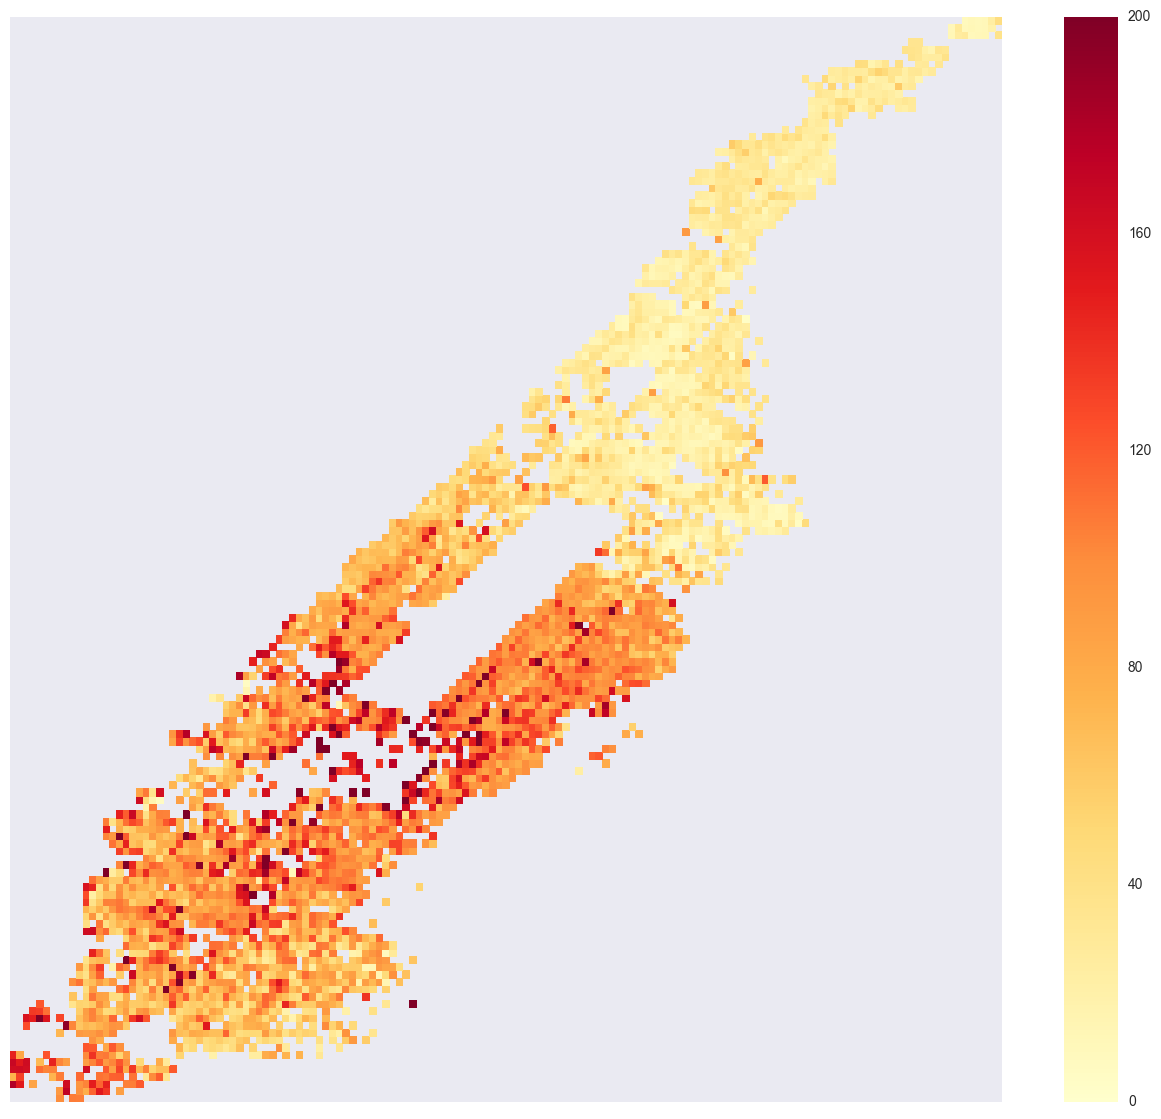

In [12]:
rcParams['figure.figsize'] = (16,14)

exp = new_mn.pivot(index='YCoord', columns='XCoord', values='VPA_tot').iloc[::-1]
g = sns.heatmap(exp, cmap='YlOrRd', vmin=0, vmax=200)
g.axes.get_yaxis().set_visible(False)
g.axes.get_xaxis().set_visible(False)
#g.patch.set_facecolor('white')